<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Daniela Benavides, Renatta García, Pablo Muñoz.

**Liga de Github:** https://github.com/renattaGS/Tareas_simproc_benavides_garcia_munoz

**Fecha:** 29 de octubre del 2020.

**Expediente** : if71483, if714983.

**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 16

# Ejercicio 1
Para ver si la venta de chips de silicio son independientes del punto del ciclo de negocios en que se encuentre la economía del país se han recogido las ventas semanales de una empresa y datos acerca de la economía del país, y se reportan los siguientes resultados:
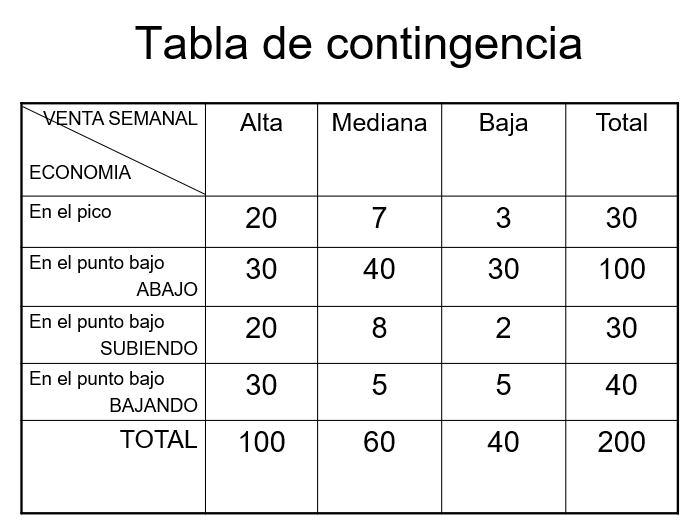

Realice la prueba de chi-cuadrado para validar la independencia del punto del ciclo de negocios en que se encuentre la economía.

In [2]:
#librerías 
import numpy as np 
import pandas as pd
import scipy.stats as st    
import matplotlib.pyplot as plt

## Solución Daniela Benavides

In [93]:
data = pd.DataFrame(index=['Pico','Abajo','Subiendo','Bajando','Total'],columns=['Alta','Mediana','Baja','Total'])
data.iloc[0,:-1] = [20,7,3]
data.iloc[1,:-1] = [30,40,30]
data.iloc[2,:-1] = [20,8,2]
data.iloc[3,:-1] = [30,5,5]
data.iloc[4,:-1] = data.sum(axis=0)
data['Total'] = data.sum(axis=1)
data

,Alta,Mediana,Baja,Total
Pico,20,7,3,30.0
Abajo,30,40,30,100.0
Subiendo,20,8,2,30.0
Bajando,30,5,5,40.0
Total,100,60,40,200.0


In [94]:
P_pico = data.iloc[0,3]/data.iloc[-1,-1]
P_abajo = data.iloc[1,3]/data.iloc[-1,-1]
P_subiendo = data.iloc[2,3]/data.iloc[-1,-1]
f_o = data.loc[data.index!='Total',data.columns!='Total'].values.flatten()
f_e = np.concatenate([data.iloc[-1,:-1]*(P_pico),data.iloc[-1,:-1]*(P_abajo),data.iloc[-1,:-1]*(P_subiendo),data.iloc[-1,:-1]*(1-(P_pico+P_abajo+P_subiendo))])

f_e,f_o
# data.index

(array([15.0, 9.0, 6.0, 50.0, 30.0, 20.0, 15.0, 9.0, 6.0,
        19.999999999999996, 11.999999999999996, 7.999999999999998],
       dtype=object),
 array([20, 7, 3, 30, 40, 30, 20, 8, 2, 30, 5, 5], dtype=object))

#### Método chi cuadrado

In [95]:
F_obse = f_o #[15.0, 9.0, 6.0, 50.0, 30.0, 20.0, 15.0, 9.0, 6.0,19.999999999999996, 11.999999999999996, 7.999999999999998]
F_espe = f_e #[20, 7, 3, 30.0, 30, 40, 30, 100.0, 20, 8, 2, 30.0, 30, 5, 5, 40.0,100.0, 60.0, 40.0, 200.0]
F_obse.shape,F_espe.shape

((12,), (12,))

In [96]:
x2 = st.chisquare(F_obse,F_espe,ddof=3)
print('Valor de chi cuadrado = ',list(x2)[0],',p-value de la prueba=',list(x2)[1])

Ji = st.chi2.ppf(q = 0.9,df=3)
print('Estadístico de Ji = ',Ji)
# st.t.interval

Valor de chi cuadrado =  34.59722222222222 ,p-value de la prueba= 3.1653811153460315e-05
Estadístico de Ji =  6.251388631170325


In [97]:
x1 = st.chi2.cdf(list(x2)[0],df=3)
x1

0.9999998518101967

#### Conclusión
Como podemos observar el p-value < alpha(0.1), por lo que la hipótesis nula $H_0$ se rechaza, y podemos decir que la venta de chips no depende del punto del ciclo de negocios de la economía de nuestro país.

## Solución Renatta García 

In [3]:
#creación de data frame 
data = pd.DataFrame(index=['Pico','Abajo','Subiendo', 'Bajando'],columns=['Alta', 'Mediana', 'Baja'])
data['Alta'] = [20,30,20,30]
data['Mediana'] = [7,40,8,5]
data['Baja']=[3,30,2,5]

data['total'] = data.sum(axis=1)
data.loc['total',:] = data.sum(axis=0)
data

,Alta,Mediana,Baja,total
Pico,20.0,7.0,3.0,30.0
Abajo,30.0,40.0,30.0,100.0
Subiendo,20.0,8.0,2.0,30.0
Bajando,30.0,5.0,5.0,40.0
total,100.0,60.0,40.0,200.0


In [8]:
P_alta = data.iloc[0,3]/data.iloc[-1,-1]
P_mediana = data.iloc[1,3]/data.iloc[-1,-1]
P_baja = data.iloc[2,3]/data.iloc[-1,-1]
P_total=P_alta+P_mediana+P_baja

f_o = data.loc[data.index!='total',data.columns!='total'].values.flatten()
f_e = np.concatenate([data.iloc[-1,:-1]*P_alta,
                      data.iloc[-1,:-1]*P_mediana,
                      data.iloc[-1,:-1]*P_baja,
                      data.iloc[-1,:-1]*(1-P_total)])

f_o, f_e

(array([20.,  7.,  3., 30., 40., 30., 20.,  8.,  2., 30.,  5.,  5.]),
 array([15.,  9.,  6., 50., 30., 20., 15.,  9.,  6., 20., 12.,  8.]))

In [9]:
#### Método chi cuadrado
F_obse = f_o 
F_espe = f_e 

x2 = st.chisquare(F_obse,F_espe,ddof=3*2)
print('Valor de chi cuadrado = ',list(x2)[0],',p-value de la prueba=',list(x2)[1])

Ji = st.chi2.ppf(q = 0.9,df=3)
print('Estadístico de Ji = ',Ji)

Valor de chi cuadrado =  34.59722222222222 ,p-value de la prueba= 1.810412864466741e-06
Estadístico de Ji =  6.251388631170325


In [10]:
x1 = st.chi2.cdf(list(x2)[0],df=3)
x1

0.9999998518101967

Dado que el p-value es un valor muy pequeño, entonces rechazamos la hipótesis nula, es decir que la venta semanal de chips no depende del ciclo de la economía. 

## Solución Pablo Muñoz

# Pregunta 2
> Ver en este enlace la forma de probar independencia: https://stattrek.com/chi-square-test/independence.aspx?Tutorial=AP
Del enlace anterior replicar los resultados reportados de `Homogeneidad` y `prueba de bondad y ajuste` en python. De esta manera entender cómo se deben realizar estas dos pruebas adicionales.
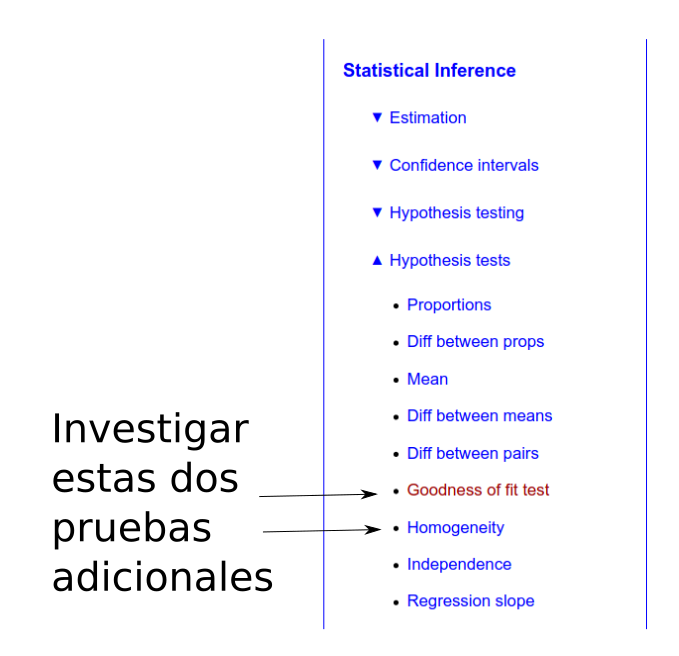

## Solución Daniela Benavides

### Chi-Square Goodness of Fit Test

#### Problem

Acme Toy Company prints baseball cards. The company claims that 30% of the cards are rookies, 60% veterans but not All-Stars, and 10% are veteran All-Stars.

Suppose a random sample of 100 cards has 50 rookies, 45 veterans, and 5 All-Stars. Is this consistent with Acme's claim? Use a 0.05 level of significance.

$H_0 =$ las proporciones de rookies, veterans, y all-starts es $30\%,60\%,10\%$ respectivamente.

$H_a =$ al menos una de las proporciones de la $H_0$ es falsa.


In [102]:
alpha = 0.05

data2 = pd.DataFrame(index=['rookies','veterans not all-stars','veteran all-satrs'],columns=['Proporciones', 'Random Sample'])
data2['Proporciones'] = [0.30,0.60,0.10]
data2['Random Sample'] = [50, 45, 5]
data2

,Proporciones,Random Sample
rookies,0.3,50
veterans not all-stars,0.6,45
veteran all-satrs,0.1,5


In [103]:
# grados de libertad
df = 2

f_e2 = np.array(data2['Proporciones']*100, dtype=object)
f_o2 = np.array(data2['Random Sample'], dtype=object)

f_e2, f_o2

(array([30.0, 60.0, 10.0], dtype=object), array([50, 45, 5], dtype=object))

#### Método chi cuadrado

In [104]:
F_obse2 = f_o2 
F_espe2 = f_e2 

x2_2 = st.chisquare(F_obse2, F_espe2, ddof=1.99)
print('Valor de chi cuadrado = ',list(x2_2)[0],', p-value de la prueba=',list(x2_2)[1])

Ji_2 = st.chi2.ppf(q = 0.95, df=1.99)
print('Estadístico de Ji = ',Ji_2)

Valor de chi cuadrado =  19.583333333333336 , p-value de la prueba= 2.6486825286769527e-08
Estadístico de Ji =  5.97208204124762


In [105]:
x1_2 = st.chi2.cdf(list(x2_2)[0],df=1.99)
x1_2

0.9999449047857046

#### Conclusión

Se rechaza la hipótesis nula $H_0$ porque el p-value es menor a 0.05 (alpha), entonces alguna de las proporciones de las cartas de la compañía está incorrecta.

### Chi-Square Test of Homogeneity

#### Problem

In a study of the television viewing habits of children, a developmental psychologist selects a random sample of 300 first graders - 100 boys and 200 girls. Each child is asked which of the following TV programs they like best: The Lone Ranger, Sesame Street, or The Simpsons. Results are shown in the contingency table below.

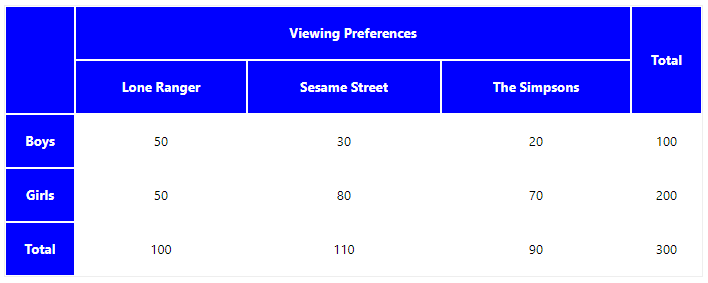

Do the boys' preferences for these TV programs differ significantly from the girls' preferences? Use a 0.05 level of significance.

$H_0 =$ la proporción de niños que prefieren Lone Ranger es idéntica a la proporción de niñas, de igual manera para los otros programas.

$H_a =$ al menos una de las proporciones de la $H_0$ es falsa.


In [114]:
data3 = pd.DataFrame(index=['Boys','Girls','total'],columns=['Lone Ranger','Sesame Street','The Simpsons','total'])
data3.iloc[0,:-1] = [50,30,20]
data3.iloc[1,:-1] = [50,80,70]
data3['total'] = data3.sum(axis=1)
data3.loc['total',:] = data3.sum(axis=0)
data3

,Lone Ranger,Sesame Street,The Simpsons,total
Boys,50,30,20,100.0
Girls,50,80,70,200.0
total,100,110,90,300.0


In [117]:
P3 = data3.iloc[0,3]/data3.iloc[-1,-1]
f_o3 = data3.loc[data3.index!='total',data3.columns!='total'].values.flatten()
f_e3 = np.concatenate([data3.iloc[-1,:-1]*P3,data3.iloc[-1,:-1]*(1-P3)])

f_e3, f_o3

(array([33.33333333333333, 36.666666666666664, 30.0, 66.66666666666667,
        73.33333333333334, 60.00000000000001], dtype=object),
 array([50, 30, 20, 50, 80, 70], dtype=object))

#### Método chi cuadrado

In [119]:
F_obse3 = f_o3
F_espe3 = f_e3 

x2_3 = st.chisquare(F_obse3, F_espe3, ddof=2)
print('Valor de chi cuadrado = ', list(x2_3)[0],',p-value de la prueba=',list(x2_3)[1])

Ji3 = st.chi2.ppf(q = 0.9, df=2)
print('Estadístico de Ji = ',Ji3)
# st.t.interval

Valor de chi cuadrado =  19.318181818181824 ,p-value de la prueba= 0.00023495405224903575
Estadístico de Ji =  4.605170185988092


In [120]:
x1_3 = st.chi2.cdf(list(x2_3)[0], df=2)
x1_3

0.9999361574657741

#### Conclusión

Se rechaza la hipótesis nula $H_0$ porque el p-value es menor a 0.05 (alpha), por lo que podemos decir que alguna de las proporciones de niños y niñas que prefieren ver cualquier programa está mal.

## Solución Renatta García 

## Solución Pablo Muñoz